
<p align="center"><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true"></p><h1><font color='0B5345'> <center>

Informática II

 </center></font></h1>
<h2><font color='0B5345'> <center>
Parcial II: Computación numérica en python</center></font></h2>
<font  face="Courier New" size="3">

<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia - Bioingeniería</font></b> </center></p3>




Nombre: Grissy Liliana Cardiles Martinez    

Cédula: 1005182785


Antes de iniciar leer cuidadosamente cada enunciado antes de responder y asegurarse de comprender completamente lo que se está solicitando. 

¡Buena suerte!

1. (50%) La electromiografía (EMG) es una técnica ampliamente utilizada en medicina y fisiología para estudiar la actividad eléctrica de los músculos. Esta actividad, conocida como electromiograma (EMG), se registra mediante electrodos colocados sobre la piel o dentro del músculo, y proporciona información valiosa sobre el funcionamiento del sistema neuromuscular.

Instrucciones:

Utilizando programación orientada a objetos, cargue dos archivos de señales de EMG que contenga datos de varios electrodos (canales).

- Cree un método que muestre la información de la señal, que describa la forma de la señal y sus dimensiones (ejemplo: número de puntos de tiempo y el número de canales)

- Defina un método que sea capaz de graficar cada par de canales de EMG en un subplot con un tamaño adecuado. El número de canales es par, por lo tanto debe organizar los subplots en una matriz de dimensiones (numerodecanales/2, numerodecanales/2). Cada canal debe tener un color distinto en el gráfico.

- Los gráficos deben tener títulos, labels, cuadrícula, nombres en los ejes y cambios en el grosor de la línea.
- Debe permitir al usuario ingresar los límites del eje x a graficar.
- En este caso el gráfico es datos vs tiempo

- Defina un método que identifique y muestre la información del valor máximo de amplitud de la señal por cada canal y archivo.

- Cree un método adicional que grafique una señal que represente el promedio de todos los canales de un archivo. Esta señal promedio debe tener un estilo de línea diferente y estar en un gráfico separado.

In [30]:
import scipy.io as sio
from scipy import stats
import numpy as np 
import matplotlib.pyplot as plt

path = r"C:\Users\griss\Documents\Parcial 1 Info2\INFOII\archivo1.mat"
mat_contents = sio.loadmat(path) #asigna el contenido de ese archivo en el PATH #loadmath carga un archivo .mat
print(f'La variable cargada es del tipo: {type(mat_contents)}') #tipo de datos es diccionario en este caso 
print(f'las llaves son: {mat_contents.keys()}') #como se que es un diccionario, voy a pedirle las llaves
path2 = r"C:\Users\griss\Documents\Parcial 1 Info2\INFOII\archivo2.mat"
mat_contents2 = sio.loadmat(path2) #asigna el contenido de ese archivo en el PATH #loadmath carga un archivo .mat
print(f'La variable cargada es del tipo: {type(mat_contents2)}') #tipo de datos es diccionario en este caso 
print(f'las llaves son: {mat_contents2.keys()}') #como se que es un diccionario, voy a pedirle las llaves

La variable cargada es del tipo: <class 'dict'>
las llaves son: dict_keys(['__header__', '__version__', '__globals__', 'tiempo', 'datos'])
La variable cargada es del tipo: <class 'dict'>
las llaves son: dict_keys(['__header__', '__version__', '__globals__', 'tiempo', 'datos'])


In [29]:

def descripcionSenal(file):
      # Cargar la señal desde el archivo .mat
    data = sio.loadmat(file)
    senal = data['tiempo'] #acceder a los datos 
    senal2=data['datos']
    sensores = senal.shape[0] #primera posicion, dependiendo de como 
    puntos = senal.shape[1] 
    sensores2=senal2.shape[0]
    puntos2=senal2.shape[1] 

    print("La señal tiene la siguiente información")
    print("En el array tiempo tiene una dimensión de: ",senal.ndim) #como esta formada la señal, miro dimension y forma que me da info de como es la señal
    print(f'Además, tiene forma de {sensores} sensores y {puntos} puntos')
    print("En el array datos tiene una dimensión de: ",senal2.ndim) #como esta formada la señal, miro dimension y forma que me da info de como es la señal
    print(f'Además, tiene forma de {sensores2} sensores y tiene {puntos2} puntos')

file=r"C:\Users\griss\Documents\Parcial 1 Info2\INFOII\archivo1.mat"
descripcionSenal(file)

file2=r"C:\Users\griss\Documents\Parcial 1 Info2\INFOII\archivo2.mat"
descripcionSenal(file2)

La señal tiene la siguiente información
En el array tiempo tiene una dimensión de:  2
Además, tiene forma de 1 sensores y 63196 puntos
En el array datos tiene una dimensión de:  2
Además, tiene forma de 8 sensores y tiene 63196 puntos
La señal tiene la siguiente información
En el array tiempo tiene una dimensión de:  2
Además, tiene forma de 1 sensores y 57974 puntos
En el array datos tiene una dimensión de:  2
Además, tiene forma de 8 sensores y tiene 57974 puntos


TypeError: list indices must be integers or slices, not tuple

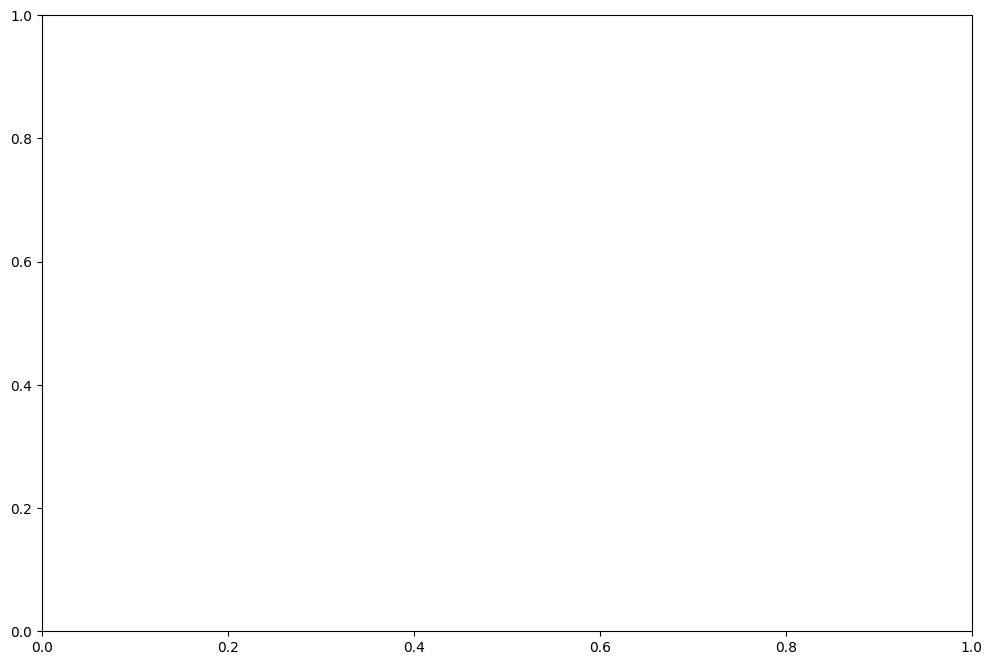

In [94]:
def graficarSenal(file,limitex):
    data=sio.loadmat(file)
    senal=data['tiempo']
    senal2=data['datos']

    canales=senal.shape[0]
    filas=max(canales//2,1)
    columnas= max(canales//2,1) #el requerimiento es que sea par
    colores=['blue','red','pink','yellow','green']    
    fig, axes = plt.subplots(filas,columnas, figsize=(12, 8))

    if filas == 1 and columnas == 1:
        axes = [[axes]]
    #for i in range(filas):
     #   plt.plot(data[i-1, :], color=colores[i-1], label=f'Electrodo {i}')
    for i in range(filas):
        for j in range(columnas):
            canal = i * columnas + j
            if limitex is not None:
                axes[i, j].plot(tiempo, senal['datos'][canal], color=colores[i-1], linewidth=1.5)
                axes[i, j].setxlim(limitex)
            else:
                axes[i, j].plot(tiempo, senal['datos'][canal], color=colores[i-1], linewidth=1.5)
            axes[i, j].set_title(f'Canal {canal}')
            axes[i, j].set_xlabel('Tiempo')
            axes[i, j].set_ylabel('Datos')
            axes[i, j].grid(True)

    plt.tight_layout()
    plt.show()

file=r"C:\Users\griss\Documents\Parcial 1 Info2\INFOII\archivo1.mat"
graficarSenal(file,limitex=(0,10))

In [ ]:

    for fila in range(filas): #acomoda todo en pares
        for columna in range(columnas):
            senal = fila * 2 + columna
            senal2 = fila * 2 + columna + 1
        if senal2<canales:
            fig, (ax1,ax2)=plt.subplots(2,1, figsize=(5,5)) #siempre tiene asociada la fig que es un cuadrado que tiene la información, ax son los ejes (AXIS) #DOS FILAS Y UNA SOLA COLUMNA
            #figsize cambia el tamaño de la figura
            ax1.plot(senal[]'x' ,label="Grafica datos",color="pink",linewidth=3) #lo que voy a graficas: asignación de los axis #label para leyendas
            ax2.plot(x2,y2, label="Grafica tiempo",color="purple",linewidth=5,linestyle=":")
            ax1.set_xlabel("Eje x")
            ax1.set_ylabel("Eje y")
            ax1.set_title("grafica tiempo")
            ax1.legend()
            ax2.set_xlabel("Eje x")
            ax2.set_ylabel("Eje y")
            ax2.set_title("grafica datos")
            ax2.legend()

- Defina un método que identifique y muestre la información del valor máximo de amplitud de la señal por cada canal y archivo.


In [103]:
def maximo(file, sensor):
    data=sio.loadmat(file)
    senal=data['tiempo']
    senal2=data['datos']

    if sensor == 1:
            maxvalor = np.max(senal)
            maxposicion = np.argmax(senal)
    elif sensor == 2:
            maxvalor = np.max(senal2)
            maxposicion = np.argmax(senal2)

    return maxvalor, maxposicion

file=r"C:\Users\griss\Documents\Parcial 1 Info2\INFOII\archivo1.mat"


maxv1, maxp1 = maximo(file, 1)
maxv2, maxp2 = maximo(file, 2)


print(f""" Sensor 1:
  Valor máximo: {maxv1}
  Posición máximo{maxp1}""")
print(f""" Sensor 2:
  Valor máximo: {maxv2}
  Posición máximo{maxp2}""")


 Sensor 1:
  Valor máximo: 65661.0
  Posición máximo63195
 Sensor 2:
  Valor máximo: 0.00127
  Posición máximo9160


In [41]:
def graficarSenal(file): 
    data=sio.loadmat(file)
    senal=data['tiempo']
    senal2=data['datos']

    canales=senal.shape[0]
    filas=canales//2
    columnas= canales//2 #el requerimiento es que sea par

    #colores=['cyan','red','pink','yellow','black']
    #fig, axs = plt.subplots(filas, columnas, figsize=(12, 6), sharex=True)

    for i in filas:
            plt.plot(data[i-1, :], color=colores[i-1], label=f'Electrodo {i}')
    
    for fila in filas: #acomoda todo en pares
        for columna in columnas:
            senal = fila * 2 + columna
            senal2 = fila * 2 + columna + 1
        if senal2<canales:
            fig, (ax1,ax2)=plt.subplots(2,1, figsize=(5,5)) #siempre tiene asociada la fig que es un cuadrado que tiene la información, ax son los ejes (AXIS) #DOS FILAS Y UNA SOLA COLUMNA
            #figsize cambia el tamaño de la figura
            ax1.plot(x1,y1,'x' ,label="Grafica datos",color="pink",linewidth=3) #lo que voy a graficas: asignación de los axis #label para leyendas
            ax2.plot(x2,y2, label="Grafica tiempo",color="purple",linewidth=5,linestyle=":")
            ax1.set_xlabel("Eje x")
            ax1.set_ylabel("Eje y")
            ax1.set_title("grafica tiempo")
            ax1.legend()
            ax2.set_xlabel("Eje x")
            ax2.set_ylabel("Eje y")
            ax2.set_title("grafica datos")
            ax2.legend()

    #plt.title('Gráficos de canales de EMG')
    #plt.xlabel('Tiempo')
    #plt.ylabel('Datos')
    #plt.legend()
    #plt.grid(True)
    plt.tight_layout()
    plt.show()


 #num_canales = datos1.shape[0]
  #num_filas = num_canales // 2
  #num_columnas = num_canales // 2

  #fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 10))
  #fig.suptitle('Gráficos de pares de canales de EMG')

  #plt.tight_layout()
  #plt.show()
    file=r"C:\Users\griss\Documents\Parcial 1 Info2\INFOII\archivo1.mat"
    graficarSenal(file)

- Cree un método adicional que grafique una señal que represente el promedio de todos los canales de un archivo. Esta señal promedio debe tener un estilo de línea diferente y estar en un gráfico separado.

In [105]:
def promedio(file):
    data= sio.loadmat(file)
    senal= data['datos']
    prom= np.mean(senal, axis=1)

    plt.figure()
    plt.plot(prom, linestyle='xx', label='Promedio canales') 
    plt.xlabel('Tiempo')
    plt.ylabel('Valor')
    plt.title('Señal promedio')
    plt.legend()
    plt.show()

file=r"C:\Users\griss\Documents\Parcial 1 Info2\INFOII\archivo1.mat"
graficarSenal(file)

SyntaxError: expected ':' (2783495342.py, line 1)

2. (20%) Utilice la librería NumPy para generar una serie de señales sinusoidales con las siguientes características:

- **Frecuencia de la señal: 1 Hz.**
- **Número de muestras: 1000.**
- **Rango de amplitud: entre 1 y 5 unidades.**

Genere un total de 5 señales sinusoidales, cada una con una amplitud aleatoria dentro del rango especificado.

Utilice la librería Matplotlib para graficar las 5 señales sinusoidales en una misma figura y cada señal debe estar etiquetada con su respectiva amplitud en la leyenda.

Incluya etiquetas adecuadas en los ejes x e y de la figura, así como un título descriptivo.

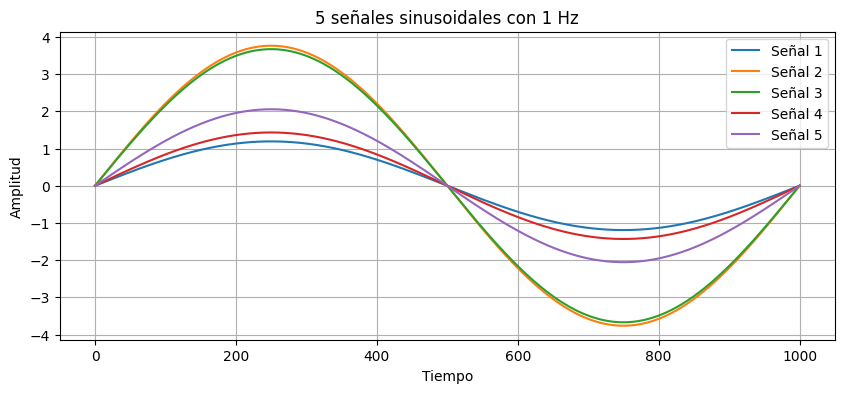

In [60]:
import numpy as np
import matplotlib.pyplot as plt

hz=1
muestras=1000
amplitudmin=1
amplitudmax=5
cantSenales=5

tiempo = np.linspace(0, muestras/hz, muestras)  # Vector de tiempo

senales = []  #almacena las señales sinusoidales

for i in range(cantSenales):
    amplitud = np.random.uniform(amplitudmin, amplitudmax)  # Amplitud aleatoria
    senal = amplitud*np.sin(2*np.pi*hz*tiempo)  # Señal sinusoidal
    senales.append(senal)

# ahora grafico se grafican con plt
colores = ['blue','red','pink','yellow','green']

plt.figure(figsize=(10, 4)) #figsize cambia el tamaño de la figura

for i, senal in enumerate(senales):
    plt.plot(tiempo, senal,label=f'Señal {i + 1}')  #grafica de la señal
    
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title(f'5 señales sinusoidales con 1 Hz')
plt.legend()
plt.grid(True)
plt.show()


3. (30%) Cargue el conjunto de datos de dispositivos médicos desde el archivo CSV 'datos_dispositivos.csv' utilizando la biblioteca Pandas.
Realice un análisis exploratorio de los datos utilizando métodos y funciones de Pandas: 

- Muestre las primeras filas del DataFrame para entender su estructura.
- Verifique la información básica del DataFrame, como el número de filas y columnas, los tipos de datos de cada columna y la presencia de valores nulos.
- Filtre el dataframe según la clasificación de riesgo de los dispositivos y cree un nuevo dataframe para cada uno de ellos.
- Por medio de filtros y métodos de pandas identifique los diferentes fabricantes de los dispositivos de la bases de datos y cuantos dispositivos corresponden a cada uno de los fabricantes.

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("datos_dispositivos.csv", delimiter=",")
print(df.head()) #imprime las primeras filas
filas,columnas=df.shape
tipo=df.dtypes
nulos = df.isnull().sum()

print(f'El dataframe tiene {filas} filas, {columnas} columnas, es de tipo {tipo} y tiene {nulos} valores nulos')

   ID         Nombre_dispositivo   Fabricante Clasificacion
0   1  Monitor de signos vitales      MedTech          Bajo
1   2              Desfibrilador     LifeCare      Moderado
2   3         Electrocardiograma   CardioTech          Alto
3   4                 Respirador  RespiraCorp          Bajo
4   5          Bomba de infusión     InfuseCo      Moderado
El dataframe tiene 30 filas, 4 columnas, es de tipo ID                     int64
Nombre_dispositivo    object
Fabricante            object
Clasificacion         object
dtype: object y tiene ID                    0
Nombre_dispositivo    0
Fabricante            0
Clasificacion         0
dtype: int64 valores nulos


In [86]:

riesgosDM={}
clasificacion=['Alto','Bajo','Moderado']
for riesgos in clasificacion:
    filtrado = df[df['Clasificacion'].isin([riesgos])]
    
    riesgosDM[riesgos]=filtrado


print(riesgosDM)

{'Alto':     ID                 Nombre_dispositivo  Fabricante Clasificacion
2    3                 Electrocardiograma  CardioTech          Alto
5    6         Monitor de gases en sangre  CardioTech          Alto
6    7      Bomba de insulina intravenosa  CardioTech          Alto
14  15      Monitor de constantes vitales  CardioTech          Alto
18  19  Bomba de infusión de medicamentos  CardioTech          Alto
22  23               Desfibrilador manual    LifeCare          Alto
26  27               Desfibrilador manual     MedTech          Alto
28  29     Bomba de perfusión de insulina  CardioTech          Alto, 'Bajo':     ID                  Nombre_dispositivo   Fabricante Clasificacion
0    1           Monitor de signos vitales      MedTech          Bajo
3    4                          Respirador  RespiraCorp          Bajo
7    8           Monitor de ritmo cardíaco   CardioTech          Bajo
8    9  Monitor de signos vitales neonatal      MedTech          Bajo
9   10          Moni

In [87]:
print(df['Fabricante'])

0         MedTech
1        LifeCare
2      CardioTech
3     RespiraCorp
4        InfuseCo
5      CardioTech
6      CardioTech
7      CardioTech
8         MedTech
9     RespiraCorp
10        MedTech
11       InfuseCo
12     CardioTech
13    RespiraCorp
14     CardioTech
15        MedTech
16       LifeCare
17        MedTech
18     CardioTech
19     CardioTech
20       LifeCare
21        MedTech
22       LifeCare
23        MedTech
24       LifeCare
25        MedTech
26        MedTech
27       LifeCare
28     CardioTech
29       LifeCare
Name: Fabricante, dtype: object


In [89]:
fabricantes={}
clasificacionF=['MedTech','LifeCare','RespiraCorp','CardioTech','InfuseCo']
for fabricante in clasificacionF:
    filtrado = df[df['Fabricante'].isin([fabricante])]
    
    fabricantes[fabricante]=filtrado


print(fabricantes)

{'MedTech':     ID                  Nombre_dispositivo Fabricante Clasificacion
0    1           Monitor de signos vitales    MedTech          Bajo
8    9  Monitor de signos vitales neonatal    MedTech          Bajo
10  11        Bomba de infusión de morfina    MedTech          Bajo
15  16                Desfibrilador manual    MedTech      Moderado
17  18            Desfibrilador pediátrico    MedTech          Bajo
21  22                Desfibrilador manual    MedTech          Bajo
23  24   Bomba de infusión de medicamentos    MedTech          Bajo
25  26              Desfibrilador portátil    MedTech      Moderado
26  27                Desfibrilador manual    MedTech          Alto, 'LifeCare':     ID              Nombre_dispositivo Fabricante Clasificacion
1    2                   Desfibrilador   LifeCare      Moderado
16  17        Desfibrilador pediátrico   LifeCare          Bajo
20  21  Electrocardiógrafo ambulatorio   LifeCare      Moderado
22  23            Desfibrilador manual 

**Éxitos y recuerden que la entrega del parcial se realiza subiendo este notebook a su repositorio de github.**